## Support lines strategy

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from SupportLinesStrategy import SupportLinesStrategy

In [66]:
test = pd.read_csv('./data/2019-1-1-BTCUSDT-5m.csv').take(range(805))

In [67]:
strategy = SupportLinesStrategy(n=21, size=805)

In [68]:
for _, row in test.iterrows():
    ts = datetime.fromtimestamp(row['Open time']/1000)
    strategy.capture(ts, row['Open'], row['Close'], row['High'], row['Low'], row['Volume'], row['Number of trades'])

In [69]:
min_lines = []
max_lines = []

for l in strategy.min_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    min_lines.append(r)
    
for l in strategy.max_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    max_lines.append(r)

Text(0.5, 0, 'Intervals')

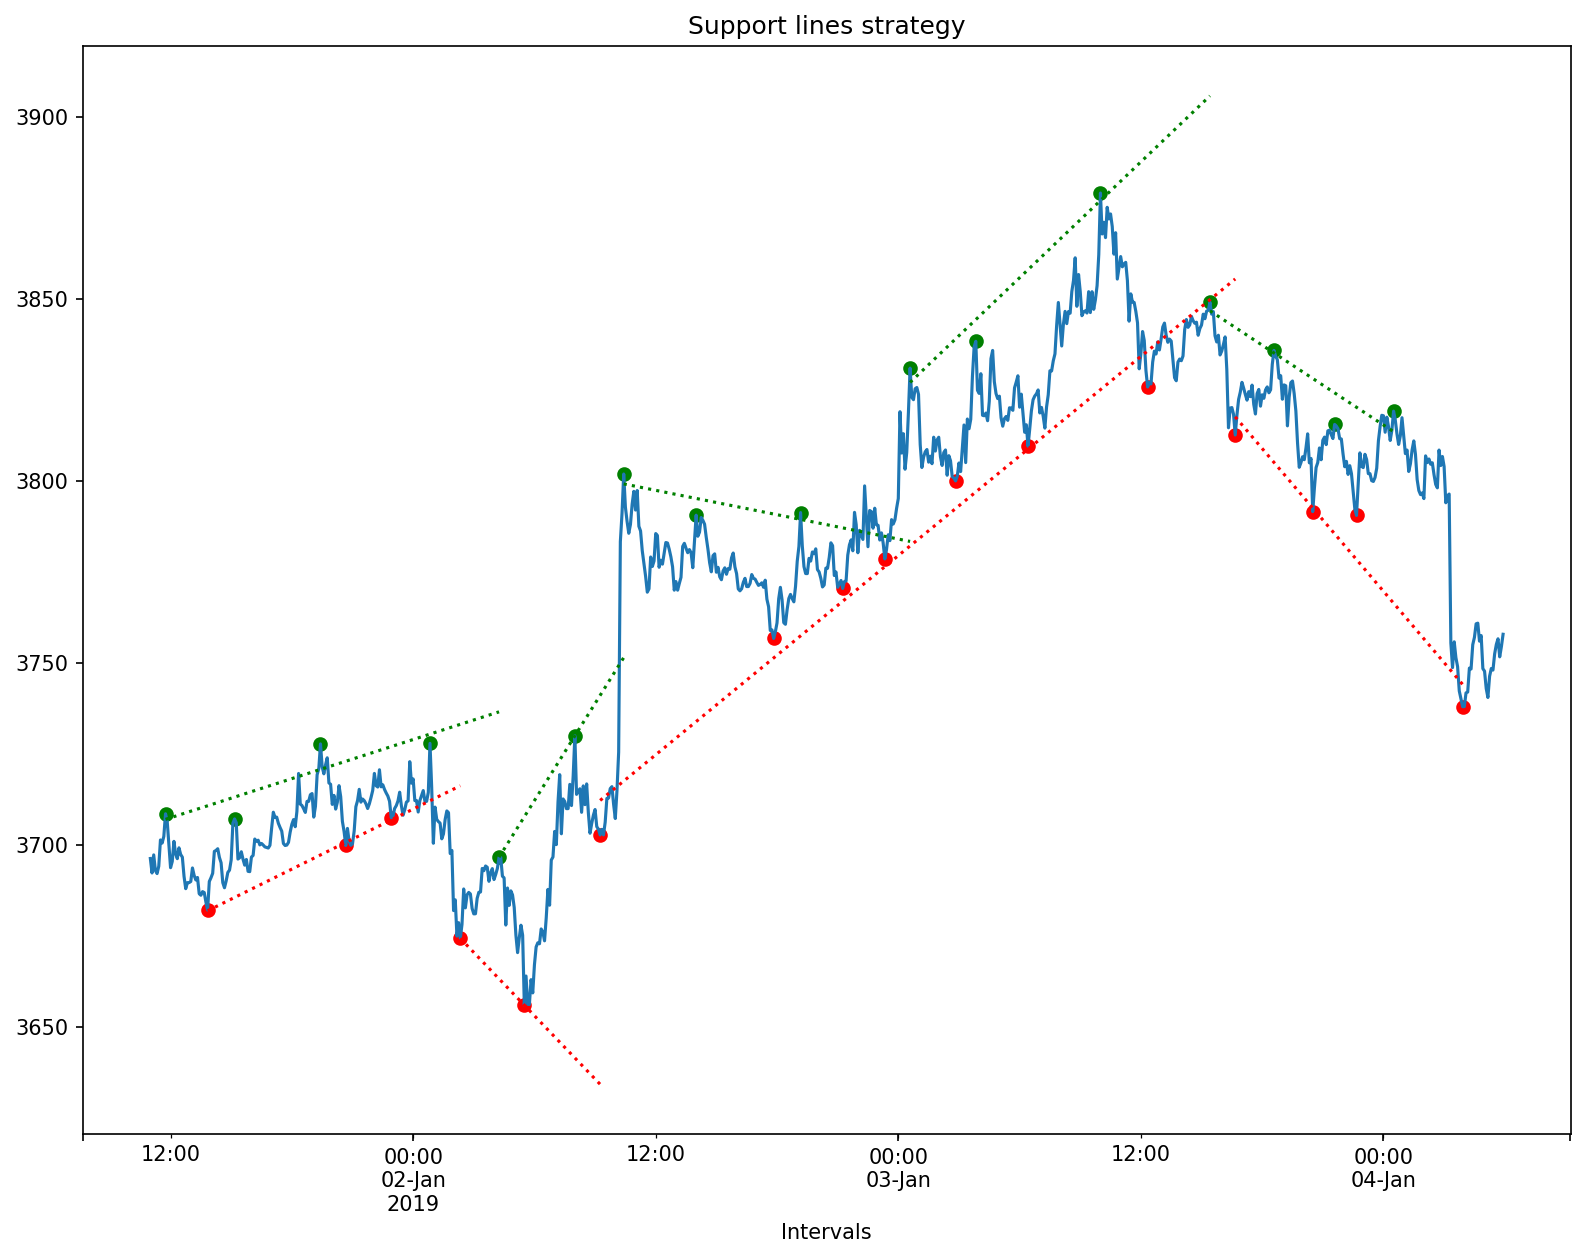

In [70]:
plt.figure(figsize=(12.8, 9.6), dpi=150)

strategy.df["close"].plot()
plt.scatter(strategy.df.index, strategy.df['min'], c='r')
plt.scatter(strategy.df.index, strategy.df['max'], c='g')
for sl in min_lines: sl['price'].plot(c='r',linestyle=':')
for sl in max_lines: sl['price'].plot(c='g',linestyle=':')
plt.title("Support lines strategy")
plt.xlabel("Intervals")